## Load data

In [1]:
import numpy as np
import _pickle as pkl
import torch
import torch.nn as nn
%matplotlib inline 
import matplotlib.pyplot as plt
import os, sys, time
sys.path.append('../..')
from utils import set_seed_torch, rgb2gray, load_vh_models, frame_stack
set_seed_torch(3)
from train import encode
from argparse import Namespace
import json
import gzip

In [4]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d
        
args = ObjectView({
 'res': 64,
 'dataset_path': ['/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/{}'
                   .format("vha1_2D_len16_oscxy_withGT_0B7AB071F98942578ABDA66879290F2F.pkl"),
                  '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/{}'
                   .format("vha2_2D_len16_oscxy_withGT_3502DE81F7C343FB8B57FA92FDECF4DA.pkl"),
                  '/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/{}'
                   .format("vha3_2D_len16_oscxy_withGT_5DB32B21A6AA4E5892D2F6B8F40EF9E6.pkl")
                 ],
 'models_dir': '/home/olimoyo/visual-haptic-dynamics/saved_models/{}'
                   .format("vh"),
#  'dataset_path': ['/home/olimoyo/visual-haptic-dynamics/experiments/data/datasets/mit_push/{}'
#                    .format("min-tr2.5_min-rot0.5_len48.pkl")
#                  ],
#  'models_dir': '/home/olimoyo/visual-haptic-dynamics/saved_models/{}'
#                    .format("mit"),
 'device': 'cuda:1',
 'n_examples': 4,
 'n_pred': 11,
 'n_initial': 2
})

def load_models_dir(models_dir):
    """Load hyperparameters from trained model."""
    dict_of_models = {}
    for filedir in os.listdir(models_dir):
        fullpath = os.path.join(models_dir, filedir)
        if os.path.isdir(fullpath):
            with open(os.path.join(fullpath, 'hyperparameters.txt'), 'r') as fp:
                dict_of_models[fullpath] = Namespace(**json.load(fp))
    return dict_of_models

def is_gz_file(filepath):
    with open(filepath, 'rb') as test_f:
        return test_f.read(2) == b'\x1f\x8b'
    
data = {
#     'img_rgb': [],
    'img_gray': [],
    'haptic': [],
    'arm': [],
    'actions': []
}

for dataset_path in args.dataset_path:
    if is_gz_file(dataset_path):
        with gzip.open(dataset_path, 'rb') as f:
            raw_data = pkl.load(f)
    else:
        with open(dataset_path, 'rb') as f:
            raw_data = pkl.load(f)

#     data['img_rgb'].append(torch.from_numpy(raw_data["img"].transpose(0, 1, 4, 2, 3)).int().to(device=args.device))
    data['img_gray'].append(torch.from_numpy(rgb2gray(raw_data["img"]).transpose(0, 1, 4, 2, 3)).float().to(device=args.device))
    data['haptic'].append(torch.from_numpy(raw_data['ft']).float().to(device=args.device))
    data['arm'].append(torch.from_numpy(raw_data['arm']).float().to(device=args.device))
    data['actions'].append(torch.from_numpy(raw_data["action"]).to(device=args.device).float())

data = {k:torch.cat(v, dim=0) for k,v in data.items()}

## Visualize

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vh/1465883_nstep2_reproduce_1024optbase_noAnnealkl_yesWN_noBN_yeslearnuncertainty_notraininit_z16_net256_l0_lm_osc_vha_r1.00_kl1.00_lr3e4
MSE of predictions:  [0.5607409  0.74637896 1.0120121  1.4486407  0.9043104  1.7594036
 2.7105799  3.250122   3.6060174  6.013139   4.118046  ]


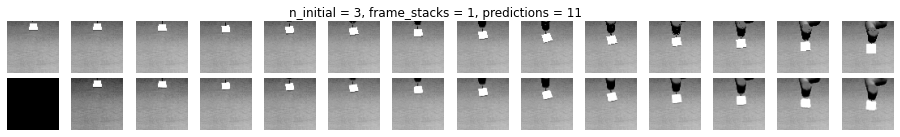

MSE of predictions:  [0.01851182 0.11476374 0.8775589  1.6263707  1.2088715  2.4662755
 2.2187986  1.0469729  2.9473221  2.4707017  4.486735  ]


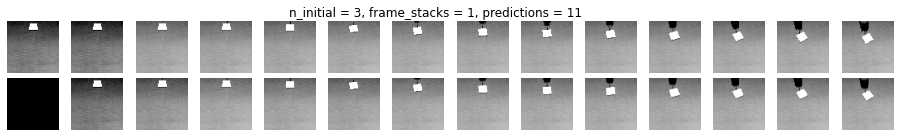

MSE of predictions:  [0.96120834 1.0843859  1.1661198  1.5331315  2.9224522  3.384925
 6.019732   5.398555   6.0870724  6.766876   5.930617  ]


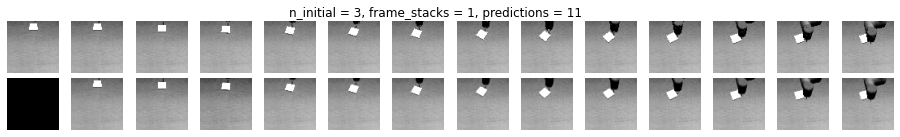

MSE of predictions:  [0.0173655  0.66245973 0.7074143  1.0670433  1.5091847  1.6126683
 2.326774   3.6836648  2.864777   3.0035748  3.477772  ]


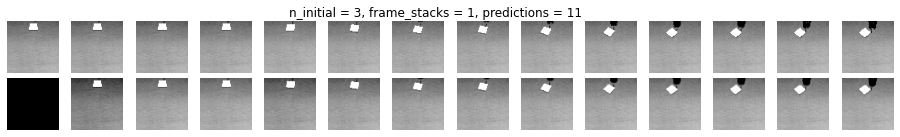

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vh/1485221_nstep2_1024optbase_noAnnealkl_yesWN_noBN_yeslearnuncertainty_notraininit_z16_net256_l0_lm_osc_va_r1.00_kl1.00_lr3e4
MSE of predictions:  [0.10069826 0.9308848  0.7605491  1.0820222  0.78183985 0.88783675
 1.6012205  1.8053834  2.4638197  2.1655765  2.9981916 ]


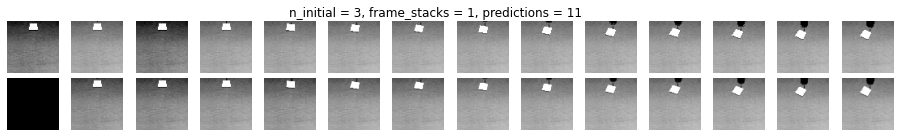

MSE of predictions:  [ 0.05711337  0.41641763  1.6476711   1.1577147   1.3040842   1.9615954
  3.7573886   3.792938    9.335953   10.189333   11.396478  ]


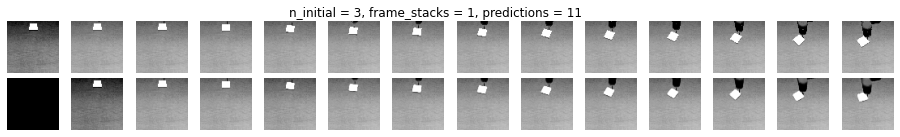

MSE of predictions:  [0.07498414 0.04294174 0.14389801 0.03662464 0.28986084 1.024124
 0.97907156 1.3184446  1.6666743  1.18388    2.9523537 ]


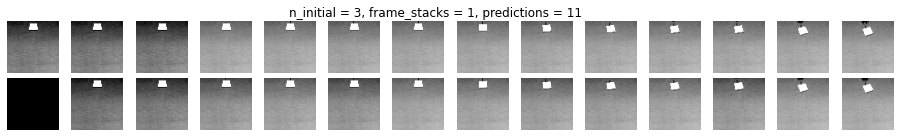

MSE of predictions:  [0.5055402 1.5234607 1.1558421 1.2007205 1.4678276 1.4007452 2.0822234
 3.1752758 2.996115  4.248687  4.790743 ]


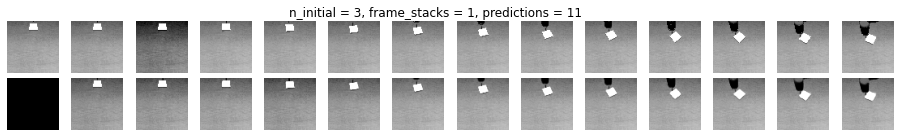

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vh/1485220_nstep2_1024optbase_noAnnealkl_yesWN_noBN_yeslearnuncertainty_notraininit_z16_net256_l0_lm_osc_vh_r1.00_kl1.00_lr3e4
MSE of predictions:  [ 1.8007414  3.516581   4.2017136  7.3047867  7.637536   8.355678
 10.73664   13.385436  13.916017  17.425558  17.849625 ]


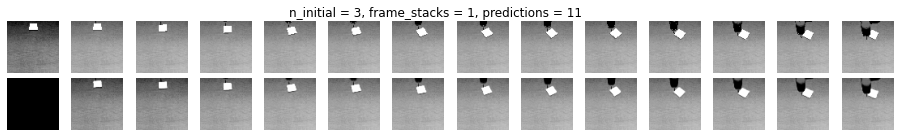

MSE of predictions:  [0.1785317  0.37166712 0.8947671  2.442519   2.9046013  1.6745679
 4.0802145  2.7094548  2.3471029  3.6323078  3.6808696 ]


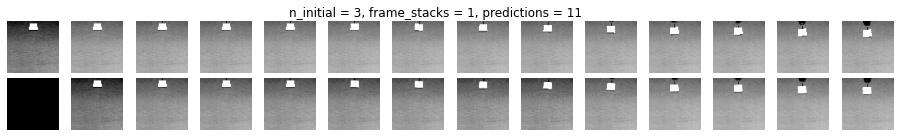

MSE of predictions:  [0.45588976 0.28602672 0.29548904 0.23420735 0.27849215 0.1299072
 1.7924844  2.1236787  3.0138595  4.14909    4.0830827 ]


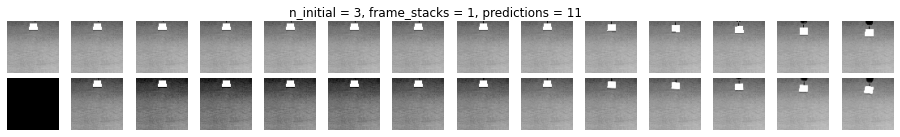

MSE of predictions:  [ 0.50961643  0.6459764   1.5515001   2.38489     2.049335    6.387105
  8.203811   10.888632   13.425989   19.784485   20.347445  ]


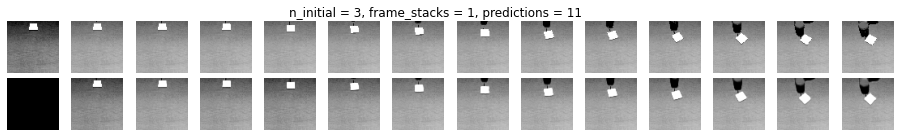

Loading models in path:  /home/olimoyo/visual-haptic-dynamics/saved_models/vh/1465882_nstep2_reproduce_1024optbase_noAnnealkl_yesWN_noBN_yeslearnuncertainty_notraininit_z16_net256_l0_lm_osc_v_r1.00_kl1.00_lr3e4
MSE of predictions:  [ 0.6607472  1.9583068  2.176062   4.128072   5.81442    7.0177026
  5.857775  10.457122  13.826871  13.431768  15.679047 ]


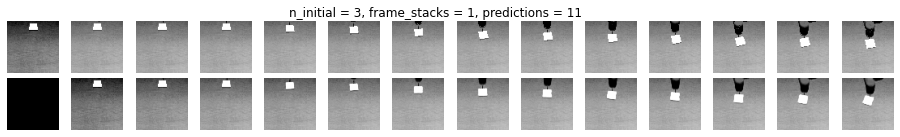

MSE of predictions:  [ 0.06993467  0.8500692   1.0544618   1.9477662   2.4092648   2.2968986
  4.561082    7.8021827   9.249154   11.634084   11.292402  ]


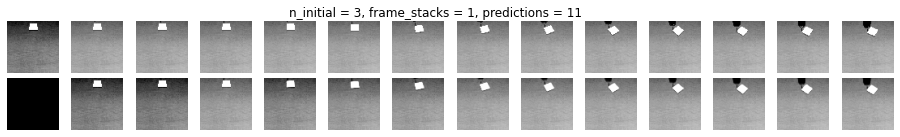

MSE of predictions:  [ 1.6889081  1.1868305  1.1484709  2.862864   3.0824175  4.0942273
  5.819527   7.1366754  9.103186   9.6074505 11.377224 ]


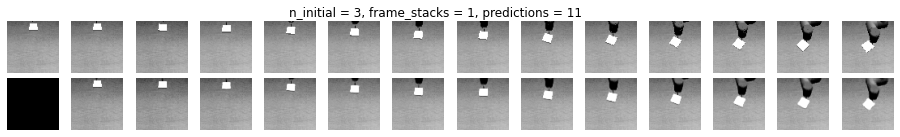

MSE of predictions:  [ 4.0578427  6.2321963  4.4558797  6.8123355  8.610093   4.7921934
  8.267898   6.8611164  8.526637   9.745902  10.005493 ]


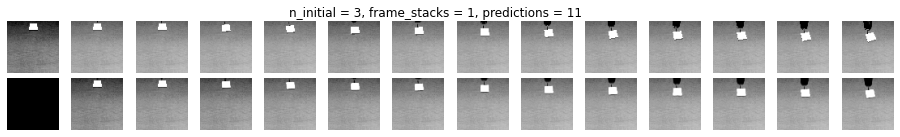

In [5]:
dict_of_models = load_models_dir(args.models_dir)

with torch.no_grad():
    for path, model_args in dict_of_models.items():
        nets = load_vh_models(path=path, args=model_args, mode='eval', device=args.device)

        # Use validation indices only
        with open(os.path.join(path, "val_idx.pkl"), 'rb') as f:
            val_idx = pkl.load(f)
        data_val = {k:v[val_idx] for k,v in data.items()}
        
#         if model_args.dim_x[0] == 1:
#             img_key = 'img_gray'
#         elif model_args.dim_x[0] == 3:
#             img_key = 'img_rgb'
        img_key = 'img_gray'
    
        T = model_args.frame_stacks
        
        assert args.n_initial + args.n_pred <= data_val[img_key].shape[1]
        assert args.n_initial > T

        # Use a random batch to test
        ii = np.random.randint(data_val[img_key].shape[0] // args.n_examples)
        batch_range = range(args.n_examples*ii, args.n_examples*(ii+1))
        test_batch = {k:v[batch_range] for k,v in data_val.items()}
        
        # Set up data for batch
        x_img = test_batch[img_key][:, :(args.n_initial + args.n_pred)]
        x_ft = test_batch['haptic'][:, :(args.n_initial + args.n_pred)]
        x_arm = test_batch['arm'][:, :(args.n_initial + args.n_pred)]
        u = test_batch['actions']
        x_i = {}
        
        # Sequence of initial images
        x_img_i = x_img[:, :args.n_initial]
        x_img_i = frame_stack(x_img_i, frames=T)
        n, l = x_img_i.shape[0], x_img_i.shape[1] 
        x_i["img"] = x_img_i
        
        # Sequence of extra modalities
        x_ft_i = x_ft[:, :args.n_initial] / model_args.ft_normalization
        x_arm_i = x_arm[:, :args.n_initial]
        u_i = u[:, T:args.n_initial]

        if model_args.context_modality != "none":
            if model_args.context_modality == "joint":
                x_i["context"] = torch.cat((x_ft_i, x_arm_i), dim=-1)
            elif model_args.context_modality == "ft":
                x_i["context"] = x_ft_i
            elif model_args.context_modality == "arm":
                x_i["context"] = x_arm_i
                
            if model_args.use_context_frame_stack:
                x_i['context'] = frame_stack(x_i['context'], frames=T)
            else:
                x_i["context"] = x_i["context"][:, T:]
            x_i["context"] = x_i["context"].transpose(-1, -2)
            
        x_i = {k:v.reshape(-1, *v.shape[2:]) for k, v in x_i.items()}

        # Encode
        if model_args.use_prior_expert:
            q_z_i, _ = encode(nets, model_args, x_i, u_i, device=args.device)
        else:
            q_z_i = encode(nets, model_args, x_i, u_i, device=args.device)

        # Group and prepare for prediction
        q_z_i = {k:v.reshape(n, l, *v.shape[1:]).transpose(1,0) for k, v in q_z_i.items()}
        u = u.transpose(1,0)

        z_hat = torch.zeros(((l + args.n_pred), n, model_args.dim_z)).to(device=args.device)
        z_hat[0:l] = q_z_i["mu"]
        
        # First run
        z_i, mu_z_i, var_z_i = q_z_i["z"], q_z_i["mu"], q_z_i["cov"]
        u_pred = u[(T + 1):(1 + args.n_initial)]
        h_i = None

        # Predict
        for jj in range(0, args.n_pred):
            z_ip1, mu_z_ip1, var_z_ip1, h_ip1 = nets["dyn"](
                z_t=z_i, 
                mu_t=mu_z_i, 
                var_t=var_z_i, 
                u=u_pred, 
                h_0=h_i, 
                single=False
            )
            z_hat[jj + l] = mu_z_ip1[-1]
            z_i, mu_z_i, var_z_i, h_i = z_ip1[-1:], mu_z_ip1[-1:], var_z_ip1[-1:], h_ip1
            u_pred = u[1 + args.n_initial + jj][None]
                        
        # Decode
        z_hat = z_hat.transpose(1, 0)
        x_hat = nets["img_dec"](z_hat.reshape(-1, *z_hat.shape[2:]))
        x_hat = x_hat.reshape(n, (l + args.n_pred), *x_hat.shape[1:])

        # Move to cpu, np
        x_hat = x_hat.cpu().numpy()
        x_img = x_img.cpu().numpy()

        mse = np.sum((x_hat[:, l:, 0].reshape(n, args.n_pred, -1) - 
                      x_img[:, args.n_initial:, 0].reshape(n, args.n_pred, -1))**2, axis=2)

        # Plotting
        for bb in range(n):
            columns = args.n_initial + args.n_pred
            rows = 2
            fig=plt.figure(figsize=(16, 2))
            fig.suptitle('n_initial = {}, frame_stacks = {}, predictions = {}'.format(args.n_initial, T, args.n_pred))
            for ii in range(columns*rows):
                if ii<((columns*rows)/2):
                    img = x_img[bb,ii,0,:,:]
                else:
                    idx = int(ii-((columns*rows)/2))
                    if idx < T:
                        img = np.zeros((model_args.dim_x[1], model_args.dim_x[2]))
                    else:
                        img = x_hat[bb,idx-1,0,:,:]
                fig.add_subplot(rows, columns, ii+1)
                plt.imshow(img, cmap="gray")
                
                plt.axis('off')
            print("MSE of predictions: ", mse[bb])
            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.show()